In [2]:
import pycaret
import pandas as pd
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data_bike_sharing.csv')
df = pd.DataFrame(data)
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [12]:
# small preprocess 
import datetime as dt
df['dteday'] = pd.to_datetime(df['dteday'])

df['date'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df.drop(columns='dteday', inplace=True)
df.drop(columns=['casual','registered'], inplace=True)


In [13]:
from pycaret.regression import *
s = setup(df,target='cnt',session_id=99)

,Description,Value
0,Session id,99
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(12165, 11)"
4,Transformed data shape,"(12165, 11)"
5,Transformed train set shape,"(8515, 11)"
6,Transformed test set shape,"(3650, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [18]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:50:39
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,55.7581,6957.3805,83.3713,0.7878,0.6358,0.8391,0.0900
rf,Random Forest Regressor,54.6128,7045.0267,83.8790,0.7852,0.6163,0.7906,0.3170
et,Extra Trees Regressor,56.3163,7669.0211,87.5266,0.7661,0.6242,0.7875,0.2200
gbr,Gradient Boosting Regressor,61.0519,7789.6818,88.2260,0.7626,0.7220,1.0416,0.0990
knn,K Neighbors Regressor,63.6630,9258.4874,96.1889,0.7174,0.6605,0.9148,0.0130
dt,Decision Tree Regressor,66.6699,12492.0087,111.6671,0.6185,0.8005,0.9098,0.0110
ada,AdaBoost Regressor,96.4219,13614.0521,116.6354,0.5855,1.1695,3.4083,0.0600
ridge,Ridge Regression,106.1855,20171.3210,141.9809,0.3859,1.2087,3.3047,0.0070
br,Bayesian Ridge,106.1832,20171.7425,141.9824,0.3859,1.2084,3.3049,0.0070
lr,Linear Regression,106.1886,20171.9222,141.9829,0.3858,1.2089,3.3042,0.3240


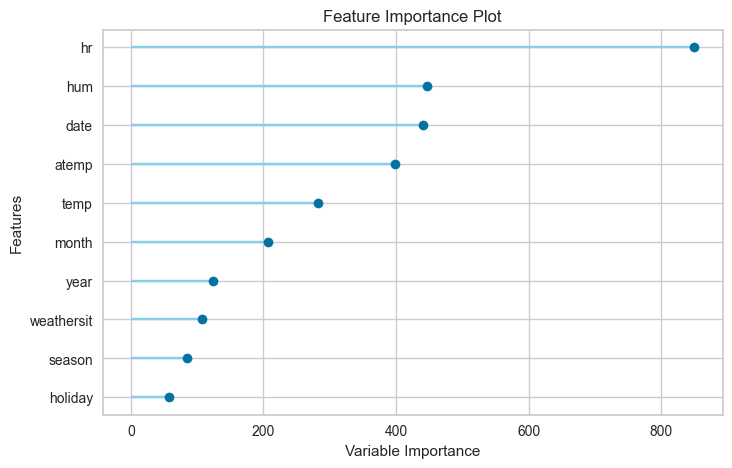

In [15]:
# plot feature importance
plot_model(best, plot = 'feature')

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,54.6844,6485.0179,80.5296,0.8013,0.6203,0.7863
